In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf

In [2]:
label_name = "id_genres_binary.tsv"
label_path = os.path.join(os.getcwd(), "data", label_name)

In [3]:
labels_df = pd.read_csv(label_path, sep='\t')
labels_df

,Unnamed: 0,id,new weird america,flamenco,gospel,folk,breakbeat,jazz trumpet,funeral doom,underground hip hop,...,country rock,raw black metal,minimal wave,grime,synthpop,gothic rock,aggrotech,uk hip hop,cyberpunk,mashup
0,0,0009fFIM1eYThaPg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0010xmHR6UICBOYT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,002Jyd0vN4HyCpqL,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,006TYKNjNxWjfKjy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,007LIJOPQ4Sb98qV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109264,109264,zzyyPUs7hC9Nz2e1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109265,109265,zzz0n04uuTUA7fNh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109266,109266,zzzj3LYaZtYtbzSr,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109267,109267,zzznMjZAKnJJXQSj,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [4]:
frequency_column = labels_df.fillna(0).astype(bool).sum(axis=0)
frequency_column[2:]

new weird america      34
flamenco               45
gospel                202
folk                 5580
breakbeat              97
                     ... 
gothic rock           483
aggrotech              25
uk hip hop              9
cyberpunk              15
mashup                  3
Length: 685, dtype: int64

In [5]:
sorted_frequency_labels_df = frequency_column.sort_values(ascending=False)
sorted_frequency_labels_df[2:]

rock                    23949
pop                     20267
electronic              11739
alternative rock         7591
indie rock               7353
                        ...  
noise punk                  2
bhangra                     1
canadian black metal        1
new beat                    1
scandipop                   1
Length: 685, dtype: int64

In [221]:
frequency_threshold = 1000

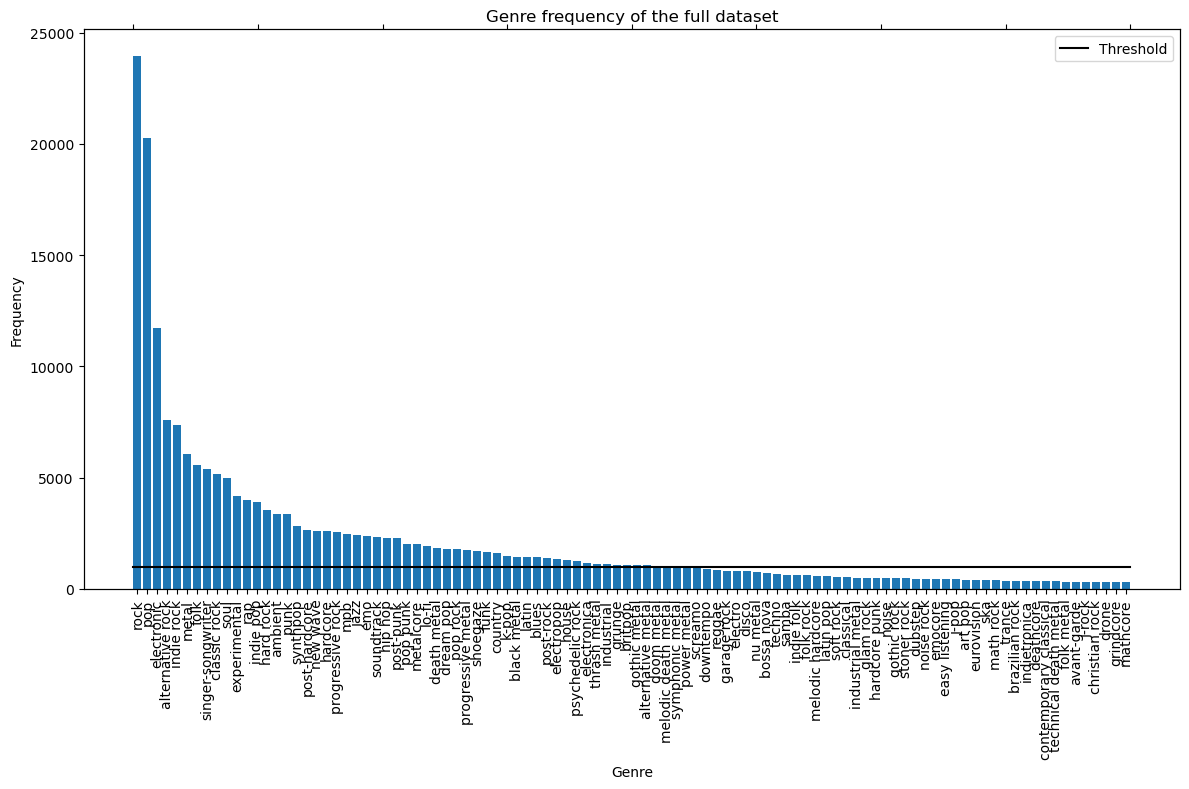

In [228]:
plt.rcParams["figure.figsize"] = [12, 8]
plt.rcParams["figure.autolayout"] = True
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.title('Genre frequency of the full dataset')
plt.xticks(fontsize=10)
plt.bar(sorted_frequency_labels_df.index[2:102], sorted_frequency_labels_df[2:102])

axes2 = plt.twiny()
x = (0, 1, 2)
threshold_space = (frequency_threshold, frequency_threshold, frequency_threshold)
axes2.plot(x, threshold_space, color='k', label='Threshold')
axes2.legend(['Threshold'], loc="upper right")
axes2.tick_params(labeltop=False)

plt.savefig('pictures/genre_frequency_full_dataset.png', dpi=300, bbox_inches='tight')
plt.show()

In [7]:
genre_list = list()
for genre in sorted_frequency_labels_df.index[2:]:
    if sorted_frequency_labels_df[genre] >= frequency_threshold:
        genre_list.append(genre)
print(f'Number of genres with over {frequency_threshold} usages: {len(genre_list)}')
genre_list.insert(0, 'id')

Number of genres with over 1000 usages: 53


In [8]:
new_labels_df = labels_df[genre_list].copy()
new_labels_df

,id,rock,pop,electronic,alternative rock,indie rock,metal,folk,singer-songwriter,classic rock,...,house,psychedelic rock,electronica,thrash metal,industrial,grunge,britpop,gothic metal,alternative metal,doom metal
0,0009fFIM1eYThaPg,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0010xmHR6UICBOYT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,002Jyd0vN4HyCpqL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,006TYKNjNxWjfKjy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,007LIJOPQ4Sb98qV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109264,zzyyPUs7hC9Nz2e1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109265,zzz0n04uuTUA7fNh,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109266,zzzj3LYaZtYtbzSr,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
109267,zzznMjZAKnJJXQSj,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
zero_entries_list = list()
# short_labels_df = new_labels_df.loc[(new_labels_df != 0).any(axis=1)]
for row in new_labels_df.iterrows():
    row_empty = True
    for col in genre_list[1:]:
        value = row[1][col]
        if value != 0:
            row_empty = False
            break
    if row_empty:
        zero_entries_list.append(row[0])
print(f'Number of entries without a genre: {len(zero_entries_list)}')

Number of entries without a genre: 7793


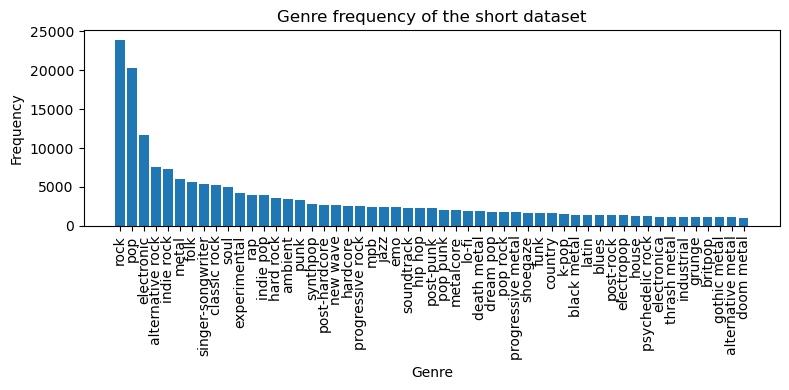

In [227]:
short_labels_df = new_labels_df.drop(zero_entries_list)
plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.autolayout"] = True
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.title('Genre frequency of the short dataset')
plt.xticks(fontsize=10)
plt.bar(short_labels_df.columns[1:], short_labels_df.iloc[:,1:].sum())
plt.savefig('pictures/genre_frequency_short_dataset.png', dpi=300, bbox_inches='tight')
plt.show()

In [11]:
print(len(new_labels_df))
print(len(short_labels_df))

109269
101476


In [12]:
new_label_name = "id_genres_binary_short.tsv"
new_label_path = os.path.join(os.getcwd(), "data", new_label_name)

In [13]:
# with open(new_label_path, 'w') as f:
#     short_labels_df.to_csv(f, sep='\t')

In [14]:
short_labels_df['id']

0         0009fFIM1eYThaPg
2         002Jyd0vN4HyCpqL
4         007LIJOPQ4Sb98qV
5         00CH4HJdxQQQbJfu
6         00DZ3XCAQb2FdCc6
                ...       
109264    zzyyPUs7hC9Nz2e1
109265    zzz0n04uuTUA7fNh
109266    zzzj3LYaZtYtbzSr
109267    zzznMjZAKnJJXQSj
109268    zzzwh2ktIWjsR7xp
Name: id, Length: 101476, dtype: object

In [15]:
for i, line in short_labels_df.iterrows():
    print(line[1:].to_numpy(dtype=np.float32))
    break

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


In [16]:
data_name = "id_incp.tsv"
data_path = os.path.join(os.getcwd(), "data", data_name)
input_df = pd.read_csv(data_path, sep='\t')[:1000]

In [17]:
input_df

,id,max0000,max0001,max0002,max0003,max0004,max0005,max0006,max0007,max0008,...,mean2038,mean2039,mean2040,mean2041,mean2042,mean2043,mean2044,mean2045,mean2046,mean2047
0,0009fFIM1eYThaPg,0.100504,0.217150,1.109056,0.281565,0.169181,0.060095,0.112506,0.392196,0.239908,...,0.650006,1.251627,0.040662,0.587215,0.047169,0.349248,0.130577,0.113338,0.679946,0.222986
1,0010xmHR6UICBOYT,0.917821,0.633825,0.434586,1.886567,0.456612,0.770272,1.035776,0.684375,0.409944,...,0.625351,0.555243,0.566060,1.070974,1.363237,0.151637,0.368685,1.006612,0.555249,0.594300
2,002Jyd0vN4HyCpqL,0.427467,0.440449,0.365439,0.606155,0.271879,0.467471,0.347926,0.414667,0.240822,...,1.234973,1.703431,1.099173,1.078372,0.576574,0.638797,0.701682,1.280766,0.793768,1.017169
3,006TYKNjNxWjfKjy,0.178398,0.012769,1.046902,0.151667,0.327802,0.174477,1.024184,0.334322,0.094742,...,0.084307,0.875821,0.086936,1.450058,0.337450,0.599117,0.166675,0.605002,0.049765,1.585881
4,007LIJOPQ4Sb98qV,0.092580,0.100842,0.080490,0.141331,0.212446,0.143001,0.015258,0.096084,0.218035,...,0.649733,0.084742,0.150941,0.637144,0.039693,0.067187,0.305528,0.775077,0.119665,0.498172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0NYOybOH3K7w2I38,0.197161,0.151122,0.122905,0.218075,0.211865,0.255904,0.539327,0.093504,0.199538,...,0.350990,1.079322,0.245772,1.969035,0.141321,0.106203,0.276403,0.841380,0.694831,0.361047
996,0NzPuMCNVqmJzOhv,0.075894,0.019422,0.227197,0.831453,0.034499,0.419602,0.444005,0.069037,0.140436,...,0.583404,1.860285,0.052346,0.180030,0.270620,0.197246,0.870882,0.299103,0.346923,1.153639
997,0O17o38iEPkl4FWD,0.318033,0.049835,0.275035,0.105400,0.082289,0.822138,0.070411,0.451825,0.093711,...,0.289145,1.779989,0.332398,1.337926,0.074038,0.069799,0.808035,0.305298,0.021617,0.613876
998,0o1t8pmtIQGVNoRX,0.054993,0.536983,0.237129,0.080761,0.021920,0.580254,0.310833,0.135037,0.021091,...,0.170389,0.535677,0.286215,1.364059,0.352527,0.264908,0.040735,0.932018,0.367763,0.544317


In [18]:
# for i, line in short_labels_df.iterrows():
#     print(input_df[input_df['id'] == line['id']].iloc[:, 1:].to_numpy(dtype=np.float32)[0])

In [110]:
simple_nn_short = [30.75, 32.1, 28.72]
deep_nn_short = [23.62, 23.62, 23.62]
knn_short = [16.65, 16.88, 15.51]
dt_short = [2.93, 2.94, 2.90]

In [112]:
freq_s_labels_df = short_labels_df[1:].groupby(short_labels_df.columns[1:].tolist(),as_index=False).size()
freq_s_labels_df.sort_values('size', ascending=False, inplace=True)

Highest Frequency of labels: 8414


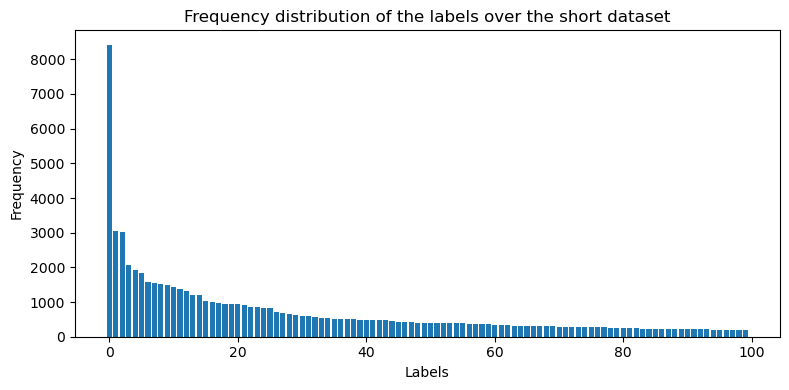

In [208]:
print(f'Highest Frequency of labels: {freq_s_labels_df["size"].iloc[0]}')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the labels over the short dataset')
plt.bar(range(0, 100), freq_s_labels_df['size'].iloc[:100])
plt.savefig('pictures/frequency_dist_labels.png', dpi=300, bbox_inches='tight')
plt.show()

In [122]:
baseline = freq_s_labels_df["size"].iloc[0] / len(short_labels_df)
print(f'Baseline for the Music4All dataset: {baseline}')

Baseline for the Music4All dataset: 0.08291615751507746


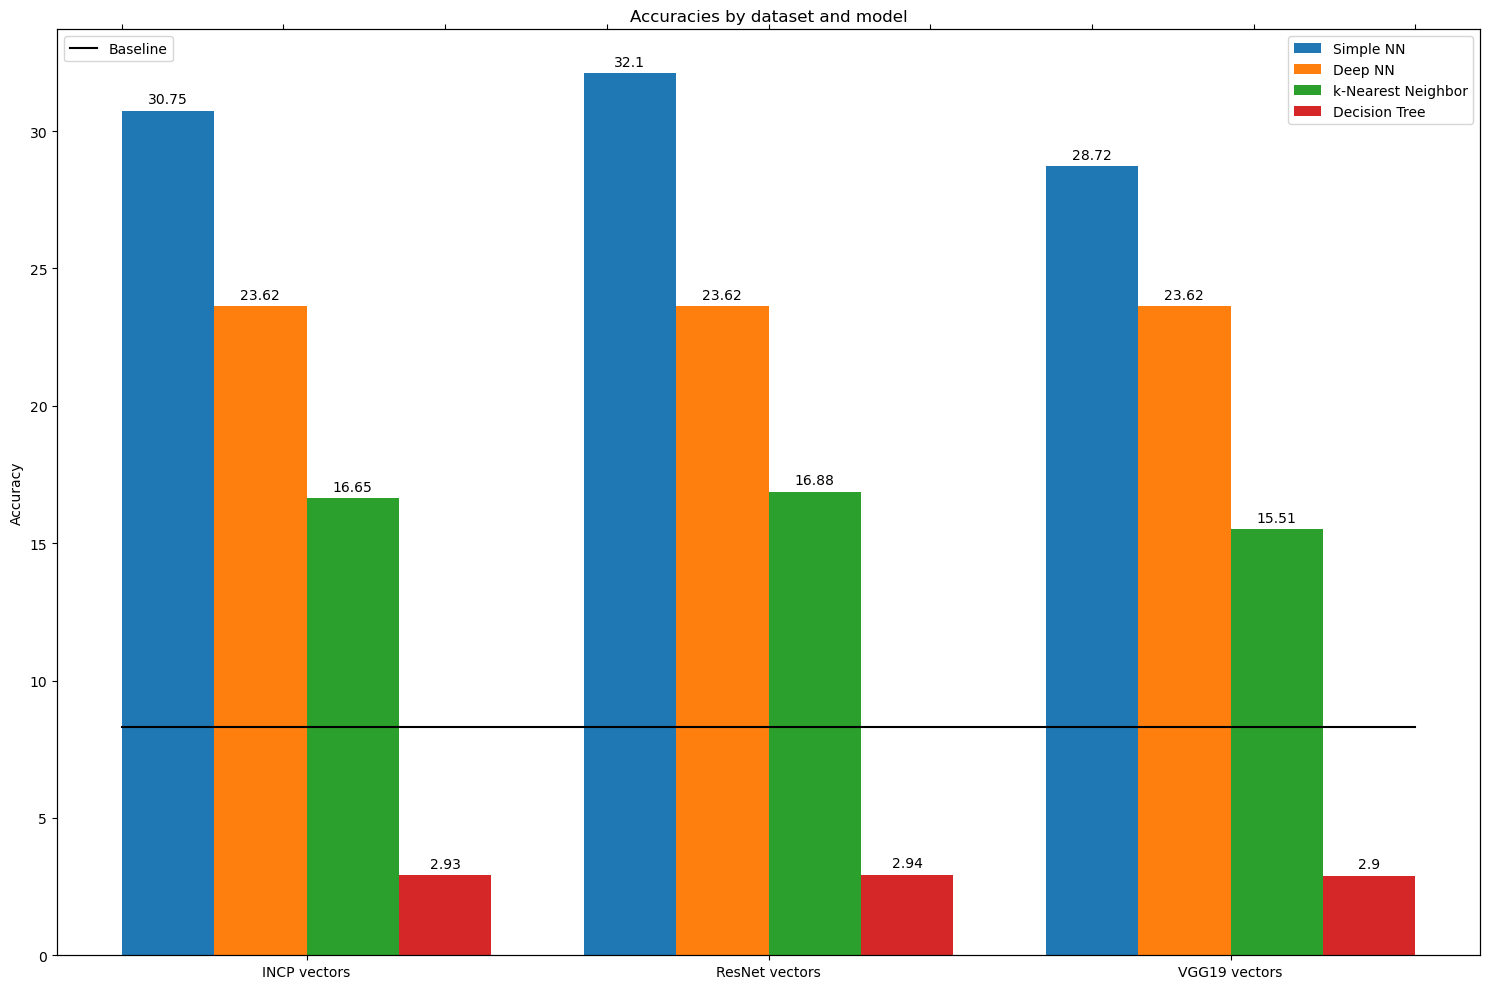

In [209]:
model_names = ['Simple NN', 'Deep NN', 'k-Nearest Neighbor', 'Decision Tree']
dataset_names = ['INCP vectors', 'ResNet vectors', 'VGG19 vectors']
model_values = np.asarray([simple_nn_short, deep_nn_short, knn_short, dt_short])

x = np.arange(len(dataset_names))  # the label locations
width = 0.2  # the width of the bars
offset = np.array((-width * 1.5, -width / 2, width / 2, width * 1.5))

fig, ax = plt.subplots(figsize=(15, 10))

rects = list()
for i in range(len(model_names)):
    rects.append(ax.bar(x + offset[i], model_values[i], width, label=model_names[i]))

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Accuracies by dataset and model')
ax.set_xticks(x, dataset_names)
ax.legend()

for i in range(len(model_names)):
    ax.bar_label(rects[i], padding=3)

axes2 = plt.twiny()
x = (0, 1, 2)
baseline_space = (baseline*100, baseline*100, baseline*100)
axes2.plot(x, baseline_space, color='k', label='Baseline')
axes2.legend(['Baseline'], loc="upper left")
axes2.tick_params(labeltop=False)

fig.tight_layout()
plt.savefig('pictures/Accuracies_short_dataset_with_baseline.png', dpi=300, bbox_inches='tight')
plt.show()

In [170]:
# Frequency of the number of labels in each row in the short dataset
freq_num_genre_sl_df = short_labels_df[short_labels_df.columns[1:]].sum(axis=1)
freq_sl_df = pd.DataFrame(freq_num_genre_sl_df).groupby([0],as_index=False).size()
freq_sl_df.sort_values('size', ascending=False, inplace=True)

Highest Frequency of genre frequency: 1 genre(s) with 43041 occurrences


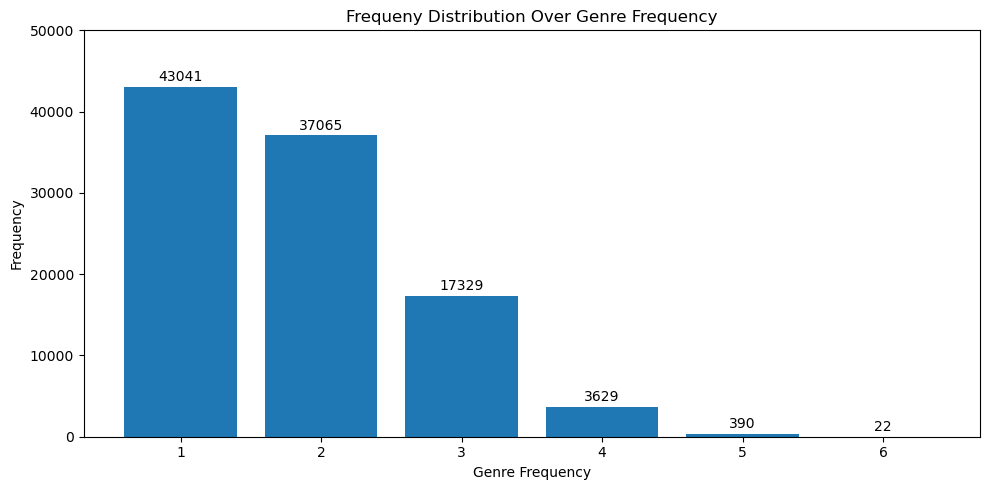

In [210]:
print(f'Highest Frequency of genre frequency: {int(freq_sl_df.iloc[0][0])} genre(s) with {freq_sl_df["size"].iloc[0]} occurrences')

fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlabel('Genre Frequency')
ax.set_ylabel('Frequency')
ax.set_title('Frequeny Distribution Over Genre Frequency')
ax.set_ylim(0, 50000)

rect = ax.bar(range(1, len(freq_sl_df)+1), freq_sl_df['size'])
ax.bar_label(rect, padding=2)

# ax.legend(['Genre Frequency'], loc='upper right')
fig.tight_layout()
plt.savefig('pictures/frequency_dist_over_genre_frequency.png', dpi=300, bbox_inches='tight')
plt.show()